In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

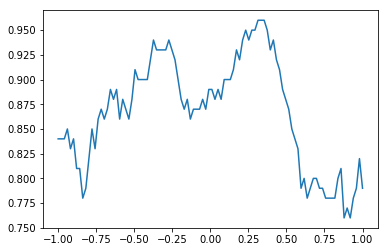

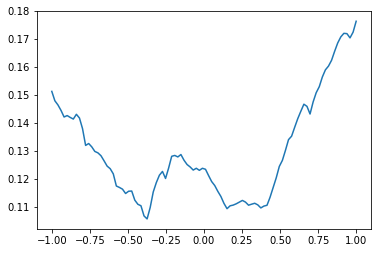

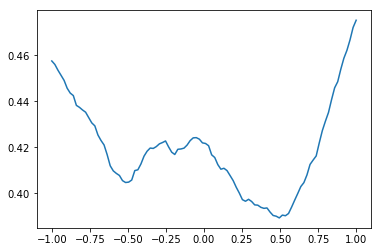

In [33]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=True)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [ ]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 100
d = 5
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=False)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [1]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
import numpy as np
import matplotlib.pyplot as plt
n = 1000
d = 5
X = np.random.uniform(-1, 1, size=(n, d))
true_fn = lambda x: 1*(x[:, 0] > 0) * x[:, 0]
y = true_fn(X) + np.random.normal(size=(n,))
est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=1)
est.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\numba\errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  3.2min finished


SubsampledHonestForest(criterion='mse', global_averaging=True, honest=True,
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=None, random_state=None,
            subsample_fr=0.5957798804722738, verbose=1, warm_start=False)

In [13]:
X_test = np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.random.normal(size=(100, d-1))])
point = est.predict(X_test)
low, up = est.predict_interval(X_test, 1, 99, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.8s finished


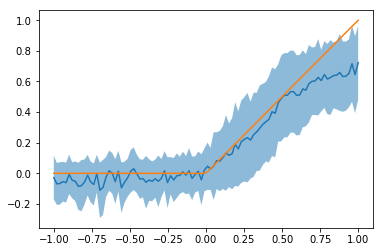

In [14]:
plt.fill_between(np.linspace(-1, 1, 100), low, up, alpha=.5)
plt.plot(np.linspace(-1, 1, 100), point)
plt.plot(np.linspace(-1, 1, 100), true_fn(np.linspace(-1, 1, 100)[:, np.newaxis]))
plt.show()

In [31]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
import numpy as np
import matplotlib.pyplot as plt
n = 5000
d = 5
X = np.random.uniform(-1, 1, size=(n, d))
true_fn = lambda x: 1*(x[:, 0] > 0) * x[:, 0]
T = np.random.normal(size=(n,))
y = true_fn(X) * T + np.random.normal(size=(n,))
est = SubsampledHonestForest(n_estimators=100, global_averaging=True, verbose=1)
est.fit(X, y/(T + 1e-6), sample_weight=T**2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished


SubsampledHonestForest(criterion='mse', global_averaging=True, honest=True,
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, random_state=None,
            subsample_fr=0.5210007309586911, verbose=1, warm_start=False)

In [32]:
X_test = np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.random.normal(size=(100, d-1))])
point = est.predict(X_test)
low, up = est.predict_interval(X_test, 1, 99, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


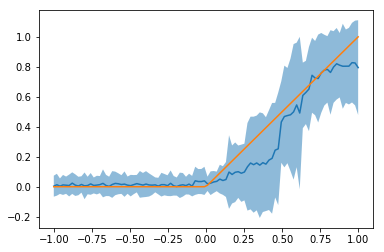

In [33]:
plt.fill_between(np.linspace(-1, 1, 100), low, up, alpha=.5)
plt.plot(np.linspace(-1, 1, 100), point)
plt.plot(np.linspace(-1, 1, 100), true_fn(np.linspace(-1, 1, 100)[:, np.newaxis]))
plt.show()

In [181]:
import numpy as np
import matplotlib.pyplot as plt
n = 4000
d = 10
X = np.random.normal(0, 1, size=(n, d))
true_fn = lambda x: np.clip(x[:, 0], 0, np.inf)
T = np.random.binomial(1, .4 + .2 * (X[:, 0] > 0)).astype(float)
y = true_fn(X) * T + X[:, 1] + np.clip(X[:, 2], -np.inf, 0) + np.random.normal(size=(n,))

x_grid = np.linspace(-2, 2, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])

In [182]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
from econml.dml import ForestDMLCateEstimator
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

est = ForestDMLCateEstimator(model_y=RandomForestRegressor(n_estimators=1000,
                                                           max_depth=4, min_samples_leaf=10),
                             model_t=RandomForestRegressor(n_estimators=1000,
                                                           max_depth=4, min_samples_leaf=10),
                             n_estimators=4000, global_averaging=True,
                             verbose=1,
                             min_samples_leaf=5, min_weight_fraction_leaf=.01)
est.fit(y, T, X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  1.1min finished


In [183]:
point = est.effect(X_test)
low, up = est.effect_interval(X_test, 5, 95, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.2s finished


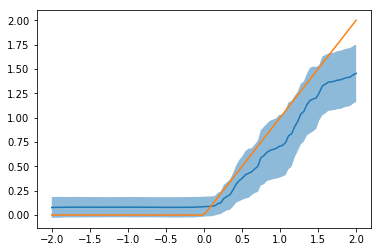

In [184]:
plt.fill_between(x_grid, low, up, alpha=.5)
plt.plot(x_grid, point)
plt.plot(x_grid, true_fn(x_grid[:, np.newaxis]))
plt.show()

In [185]:
truth = true_fn(x_grid[:, np.newaxis])
print(np.mean((low <= truth) & (truth <= up)))

0.91


In [186]:
from econml.ortho_forest import ContinuousTreatmentOrthoForest
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
est = ContinuousTreatmentOrthoForest(model_Y=LinearRegression(),
                                     model_T=LinearRegression(),
                                     n_trees=4000, subsample_ratio=.5, min_leaf_size=5)
est.fit(y, T, X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: 

In [187]:
point = est.effect(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.2s finished


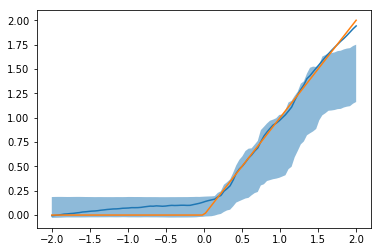

In [188]:
plt.fill_between(x_grid, low, up, alpha=.5)
plt.plot(x_grid, point)
plt.plot(x_grid, true_fn(x_grid[:, np.newaxis]))
plt.show()

In [189]:
truth = true_fn(x_grid[:, np.newaxis])
print(np.mean((low <= truth) & (truth <= up)))

0.91
